In [213]:
from __future__ import division
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [214]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [215]:
ratings_train = pd.read_csv('./homework4/data/ratings_train.csv', header=None)
ratings_test = pd.read_csv('./homework4/data/ratings_test.csv', header=None)
ratings_fake = pd.read_csv('./homework4/data/ratings_fake.csv', header=None)

In [216]:
ratings_train.columns = ['user', 'movie', 'rating']
ratings_test.columns = ['user', 'movie', 'rating']
ratings_fake.columns = ['user', 'movie', 'rating']

In [394]:
# A = ratings_fake.pivot(index='user', columns='movie').as_matrix()
A = ratings_train.pivot(index='user', columns='movie').fillna(0).as_matrix()
# A = ratings_test.pivot(index='user', columns='movie') #.as_matrix()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [493]:
def optimize_U(U, V, B, C, mu, A):
    Uis = []
    reg = 2 * lamb * np.identity(k)
    for i in range(m):
        right = 0, 
        left = 0
        if not pd.Series(A[i]).isnull().all():
            for j in range(n):
                if A[i, j]:
                    right += (B[i] + C[j] + mu - A[i,j]) * V[j]
                    left += np.outer(V[j], V[j].T)
            Ui = -np.dot(np.linalg.inv(left + reg), right)
        else:
            Ui = U[i]
        Uis.append(Ui)
    return np.array(Uis)

In [494]:
def optimize_V(U, V, B, C, mu, A):
    Vjs = []
    reg = 2 * lamb * np.identity(k)
    for j in range(n):
        right = 0, 
        left = 0
        if not pd.Series(A[:, j]).isnull().all():  
            for i in range(m):
                if A[i, j]:
                    right += (B[i] + C[j] + mu - A[i, j]) * U[i]
                    left += np.outer(U[i], U[i].T)
            Vj = -np.dot(np.linalg.inv(left + reg), right)
        else:
            Vj = V[j]
        Vjs.append(Vj)
    return np.array(Vjs)

In [495]:
def optimize_B(U, V, B, C, mu, A):
    Bis = []
    for i in range(m):
        b = 0
        if not pd.Series(A[i]).isnull().all():         
            for j in range(n):
                if A[i,j]:
                    b += -(np.dot(U[i], V[j]) + C[j] + mu - A[i,j]) / n
        else:
            b = B[i]
        Bis.append(b)
    return np.array(Bis)

In [496]:
def optimize_C(U, V, B, C, mu, A):
    Cjs = []
    for j in range(n):
        c = 0
        if not pd.Series(A[:, j]).isnull().all():
            for i in range(m):
                if A[i,j]:
                    c += -(np.dot(U[i], V[j]) + B[i] + mu - A[i,j]) / m
        else:
            c = C[j]
        Cjs.append(c)
    return np.array(Cjs)

In [497]:
def update_params(B, U, C, V):
    B = optimize_B(U, V, B, C, mu, A)
    U = optimize_U(U, V, B, C, mu, A)
    C = optimize_C(U, V, B, C, mu, A)
    V = optimize_V(U, V, B, C, mu, A)
    return (B, U, C, V)

In [498]:
def log_likelihood(B, U, C, V, mu, A):
    lls = 0
    for i in range(U.shape[0]):
        for j in range(V.shape[0]):
            if A[i, j]:
                lls += (np.dot(U[i], V[j]) + B[i] + C[j] + mu - A[i,j])**2
    return -(lls.sum()) / 2

In [499]:
def rmse(B, U, C, V, mu, A):
    card = 1/A.size

In [500]:
# def log_likelihood(B, U, C, V, mu, A):
#     lls = []
#     for i in range(m):
#         lls.append((np.dot(V, U[i]) + B[i] + C + mu + A[i,:])**2)
#     return -(np.array(lls).sum()) / 2

In [501]:
mu = A.mean()
m = A.shape[0]
n = A.shape[1]
k = 10
T = 40
B = np.zeros(m)
C = np.zeros(n)
U = np.random.multivariate_normal(np.zeros(k), (1/k) * np.identity(k), (m))
V = np.random.multivariate_normal(np.zeros(k), (1/k) * np.identity(k), (n))
lamb = 10

In [ ]:
v = []
for t in range(20):
    v.append(log_likelihood(B, U, C, V, mu, A))
    print v[t]
    B, U, C, V = update_params(B, U, C, V)

-502129.921559
-135309.044445
-48328.7471948

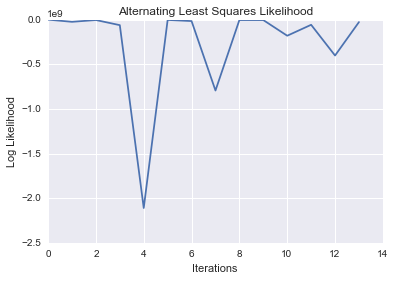

In [492]:
plt.plot(v)
plt.title('Alternating Least Squares Likelihood')
plt.xlabel('Iterations')
plt.ylabel('Log Likelihood')

In [ ]:
def clip(z):
    if z < 1:
        return 1
    if z >= 1 and z <= 5:
        return z
    if z > 5:
        return 5